enter s whether camber s=0 /reflex s=1: 1
enter r: 0.3
enter Max. Thickness in percent of chord: 0.21
enter k1: 52
enter k2/k1 value: 0.303


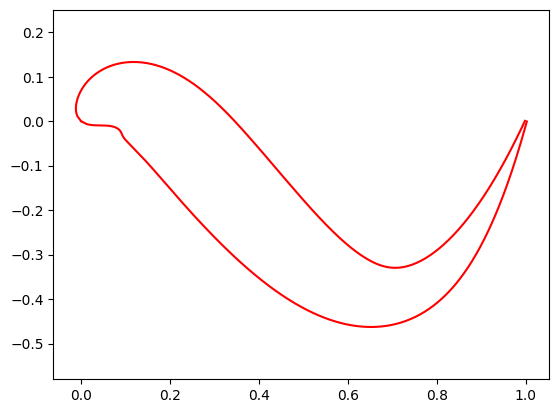

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Number of grid points
gridPts = 500

# Constants
a0 = 0.2969
a1 = -0.1260
a2 = -0.3516
a3 = 0.2843
a4 = -0.1015  # Open trailing edge
# a4 = -0.1036  # Closed trailing edge

# Input values
#k1,k= k2/k1,r are constants as per the type of airfoil
#210 camber line profile p=0.05,r=0.0580, k1=361.40
#0 210 camber line profile p=0.1,r=0.130, k1=51.990, k2/k1=k=0.000764
s = int(input('enter s whether camber s=0 /reflex s=1: '))
r = float(input('enter r: '))
T = float(input('enter Max. Thickness in percent of chord: '))
k1 = float(input('enter k1: '))
k = float(input('enter k2/k1 value: '))

# Airfoil grid
x = np.linspace(0, 1, gridPts)
# Camber and Gradient
yc = np.ones(gridPts)
dyc_dx = np.ones(gridPts)
theta = np.ones(gridPts)

for i in range(gridPts):
    if 0 <= x[i] <= r and s == 0:
        yc[i] = (1/6) * k1 * ((x[i]**3) - (3 * r * x[i]**2) + (r**2 * x[i] * (3 - r)))
        dyc_dx[i] = (k1 * ((3 * x[i]**2) - (6 * r * x[i]) + (r**2 * (3 - r)))) / 6

    elif r < x[i] <= 1 and s == 0:
        yc[i] = (k1 * r**3 * (1 - x[i])) / 6
        dyc_dx[i] = (-k1 * r**3) / 6

    elif s == 1 and 0 <= x[i] < r:

        yc[i] = (1/6) * k1 * (((x[i] - r)**3) - (k * x[i] * ((1 - r)**3)) + (r**3 * (1 - x[i])))
        dyc_dx[i] = (k1 * ((3 * (x[i] - r)**2) - (k * ((1 - r)**3)) - (r**3))) / 6

    elif r < x[i] <= 1 and s == 1:

        yc[i] = (1/6) * k1 * ((k * ((x[i] - r)**3)) - (k * x[i] * ((1 - r)**3)) + (r**3 * (1 - x[i])))
        dyc_dx[i] = (k1 * ((3 * k * ((x[i] - r)**2)) - (k * ((1 - r)**3)) - (r**3))) / 6

    theta[i] = np.arctan(dyc_dx[i])

# Thickness distribution
yt = 5 * T * (a0 * np.sqrt(x) + a1 * x + a2 * x**2 + a3 * x**3 + a4 * x**4)

# Upper surface points
xu = x - (yt * np.sin(theta))
yu = yc + (yt * np.cos(theta))

# Lower surface points
xl = x + (yt * np.sin(theta))
yl = yc - (yt * np.cos(theta))

# Plot the airfoil (with lines)
plt.figure(2)

plt.axis('equal')
plt.plot(xu, yu, 'r')
plt.plot(xl, yl, 'r')
plt.show()

